In [2]:
import sys
import os
import numpy as np
import pandas as pd
from   sklearn    import metrics
from   matplotlib import pyplot as plt
import pathlib
import json
import shutil
import subprocess

In [3]:
def find_directory(tracer,max_samples,max_times):
    cur_dir = os.getcwd()
    for res_dir in os.listdir(cur_dir):
        if os.path.isdir(res_dir):
            for json_dir in os.listdir(res_dir):
                if (pathlib.Path(json_dir).suffix == ".json") and pathlib.Path(json_dir).name != "scene.json":
                    stem = pathlib.Path(json_dir).stem
                    splits = stem.split('_')
                    json_file = open(cur_dir+'\\'+res_dir+'\\'+json_dir, 'r')
                    json_data = json.load(json_file)
                    bin_file_path = json_data['BinFilePath']
                    samples = int(json_data['Samples'])
                    time = int(json_data['Time'])
                    width = int(json_data['Width'])
                    height = int(json_data['Height'])
                    if samples == int(max_samples) and tracer == splits[1] and time == int(max_times):
                        return cur_dir+'\\'+res_dir
    return None


In [4]:
!python Analyze.py

d:\Users\shumpei\Document\Github\RTLib\Result\Fix\Scene4\Depth=4\DEF
d:\Users\shumpei\Document\Github\RTLib\build\RTLib\Src\Ext\OPX7\Release\RTLib-Ext-OPX7-Test-Comp.exe --base_dir d:\Users\shumpei\Document\Github\RTLib\Result\Fix\Scene4\Depth=4 --base_smp 1000000 --img_diff true


In [5]:
# CSV
pd_res_csv  = pd.read_csv('./Result.csv',dtype={'Type':str,' Sample':np.int64,' Time':np.int64,' MAE':np.float32,' MAPE':np.float32})

In [6]:
pd_res_map = dict()
columns = ['DEF','RIS','PGDEF','PGNEE','PGRIS','HTDEF','HTNEE','HTRIS']
column_to_labels = dict()
column_to_labels['DEF']  ='PathTracing'
column_to_labels['NEE']  ='PathTracing+NEE'
column_to_labels['RIS']  ='PathTracing+RIS'
column_to_labels['PGDEF']='Müller(2017)'
column_to_labels['PGNEE']='Müller(2017)+NEE'
column_to_labels['PGRIS']='Müller(2017)+RIS'
column_to_labels['HTDEF']='HashTree'
column_to_labels['HTNEE']='HashTree+NEE'
column_to_labels['HTRIS']='HashTree+RIS'
for column in columns:
    if column in set(pd_res_csv['Type']):
        pd_res_map[column] = pd_res_csv[pd_res_csv['Type']==column].iloc[:, [1,2,3,4]]

print(pd_res_map['DEF'].columns)

Index([' Sample', ' Time', ' MAE', ' MAPE'], dtype='object')


In [7]:
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams['font.size'] = 15 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 9 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 9 # 軸だけ変更されます
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.linewidth'] = 1.0 # axis line width
plt.rcParams['axes.grid'] = False # make grid
plt.rcParams['legend.fancybox'] = False # 丸角
plt.rcParams['legend.framealpha'] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams['legend.edgecolor'] = 'black' # edgeの色を変更
plt.rcParams['legend.handlelength'] = 1 # 凡例の線の長さを調節
plt.rcParams['legend.labelspacing'] = 1. # 垂直方向の距離の各凡例の距離
plt.rcParams['legend.handletextpad'] = 0.5 # 凡例の線と文字の距離の長さ
plt.rcParams['legend.markerscale'] = 2 # 点がある場合のmarker scale
plt.rcParams['legend.borderaxespad'] = 0. # 凡例の端とグラフの端を合わせる
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_25584\2872830207.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_spp.show()


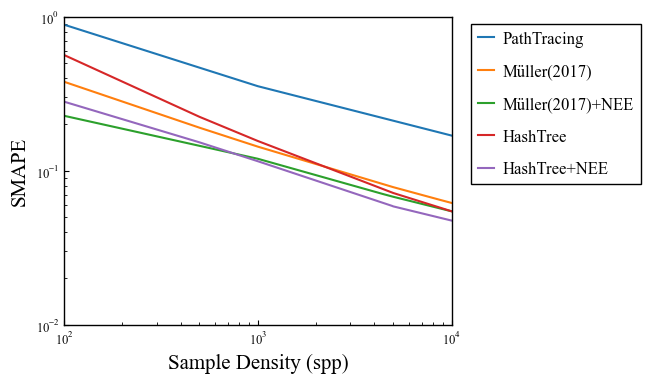

In [8]:
fig_spp = plt.figure(figsize=(5,4))
ax_spp = fig_spp.add_subplot()
for column in columns:
    if column in pd_res_map:
        pd_res_map[column].plot(ax = ax_spp, x=' Sample',y=' MAPE', label=column_to_labels[column])
        
ax_spp.legend(bbox_to_anchor=(1.05, 0.85, 0.375, 0.125), loc='upper left', borderaxespad=0, ncol=1,fontsize=12)
ax_spp.set_xlabel("Sample Density (spp)")
ax_spp.set_ylabel("SMAPE")
ax_spp.set_xlim(100,10000)
ax_spp.set_ylim(0.01,1.0)
ax_spp.set_xscale('log')
ax_spp.set_yscale('log')
fig_spp.show()
fig_spp.savefig('result_fig_spp_cornell_smape.eps', bbox_inches='tight')
fig_spp.savefig('result_fig_spp_cornell_smape.svg', bbox_inches='tight')

C:\Users\user\AppData\Local\Temp\ipykernel_25584\4015302504.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_sec.show()


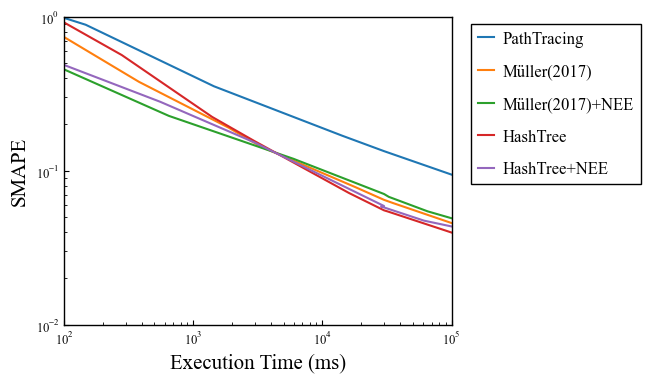

In [12]:
fig_sec = plt.figure(figsize=(5,4))
ax_sec = fig_sec.add_subplot()
for column in columns:
    if column in pd_res_map:
        pd_res_map[column].plot(ax = ax_sec, x=' Time',y=' MAPE', label=column_to_labels[column])
        
ax_sec.legend(bbox_to_anchor=(1.05, 0.85, 0.375, 0.125), loc='upper left', borderaxespad=0, ncol=1,fontsize=12)
ax_sec.set_xlabel("Execution Time (ms)")
ax_sec.set_ylabel("SMAPE")
ax_sec.set_xlim(100,100000)
ax_sec.set_ylim(0.01,1)
ax_sec.set_xscale('log')
ax_sec.set_yscale('log')
fig_sec.show()
fig_sec.savefig('result_fig_sec_cornell_smape.eps', bbox_inches='tight')
fig_sec.savefig('result_fig_sec_cornell_smape.svg', bbox_inches='tight')

In [13]:

# cur_dir = os.getcwd()
# print(cur_dir)
# dir_for_removes = []
# for res_dir in os.listdir(cur_dir):
#     if os.path.isdir(res_dir):
#         for json_dir in os.listdir(res_dir):
#             if (pathlib.Path(json_dir).suffix == ".json") and pathlib.Path(json_dir).name != "scene.json":
#                 stem = pathlib.Path(json_dir).stem
#                 splits = stem.split('_')
#                 if splits[1] =='DEF':
#                     if res_dir != 'DEF':
#                         print(cur_dir+'\\'+res_dir + ' should be removed!')
#                         dir_for_removes.append(res_dir)
#                     else:
#                         print(cur_dir+'\\'+res_dir + ' should be retained!')

# for dir in dir_for_removes:
#     shutil.rmtree(cur_dir+'\\'+dir)

In [14]:
cur_dir = os.getcwd()
print(cur_dir)
dir_for_copys = []
dir_for_copys.append('DEF')
for res_dir in os.listdir(cur_dir):
    if os.path.isdir(res_dir):
        for json_dir in os.listdir(res_dir):
            if (pathlib.Path(json_dir).suffix == ".json") and pathlib.Path(json_dir).name != "scene.json":
                stem = pathlib.Path(json_dir).stem
                splits = stem.split('_')
                json_file = open(cur_dir+'\\'+res_dir+'\\'+json_dir, 'r')
                json_data = json.load(json_file)
                bin_file_path = json_data['BinFilePath']
                samples = int(json_data['Samples'])
                time = int(json_data['Time'])
                width = int(json_data['Width'])
                height = int(json_data['Height'])
                if time > 29900 and 30100 > time :
                    dir_for_copys.append(res_dir)

print(dir_for_copys)
shutil.rmtree(cur_dir+'_comp')
os.makedirs(cur_dir+'_comp')
shutil.copyfile(cur_dir+'\\Analyze.py',cur_dir+'_comp\\Analyze.py')
for dir in dir_for_copys:
    shutil.copytree(cur_dir+'\\'+dir, cur_dir+'_comp\\'+dir)
!python {cur_dir+'_comp/Analyze.py'}

d:\Users\shumpei\Document\Github\RTLib\Result\Fix\Scene4\Depth=4
['DEF', '09-26-22-20-47-25', '09-26-22-20-55-59', '09-26-22-21-02-59', '09-26-22-21-14-32', '09-26-22-21-30-56', '10-01-22-01-55-59']
d:\Users\shumpei\Document\Github\RTLib\Result\Fix\Scene4\Depth=4_comp\DEF
d:\Users\shumpei\Document\Github\RTLib\build\RTLib\Src\Ext\OPX7\Release\RTLib-Ext-OPX7-Test-Comp.exe --base_dir d:\Users\shumpei\Document\Github\RTLib\Result\Fix\Scene4\Depth=4_comp --base_smp 1000000 --img_diff true
